In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from wordcloud import WordCloud
from collections import Counter
import re
import random

In [7]:
df=pd.read_csv('2.base_de_datos.csv')

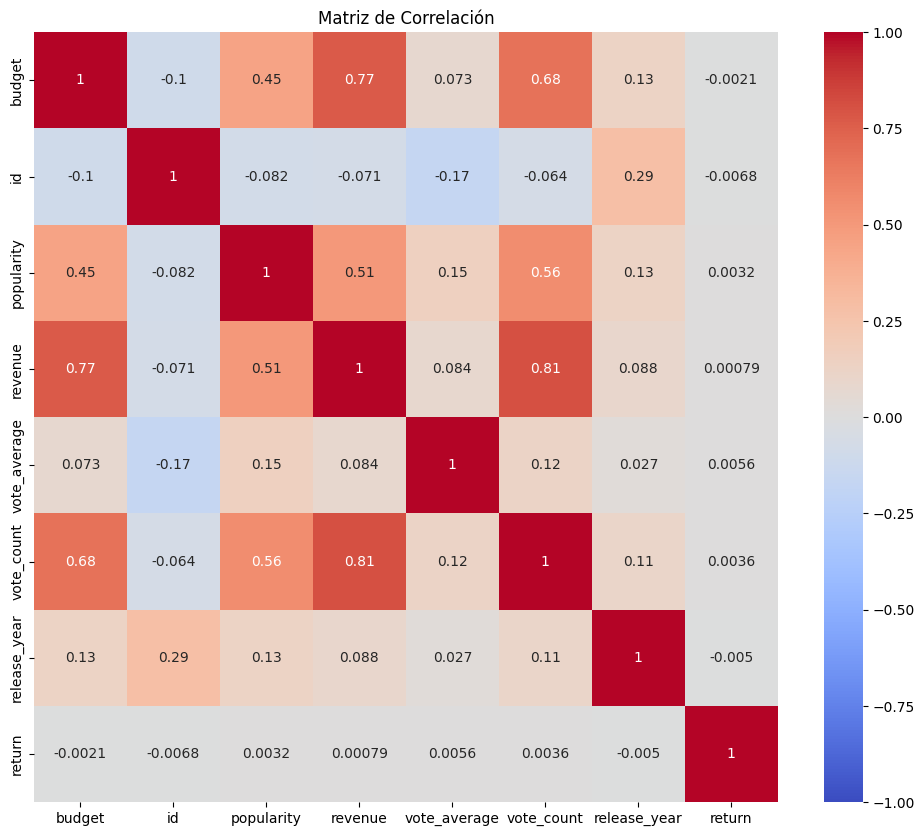

In [9]:
#Matriz de correlacion

numeric_df = df.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlación')
plt.show()

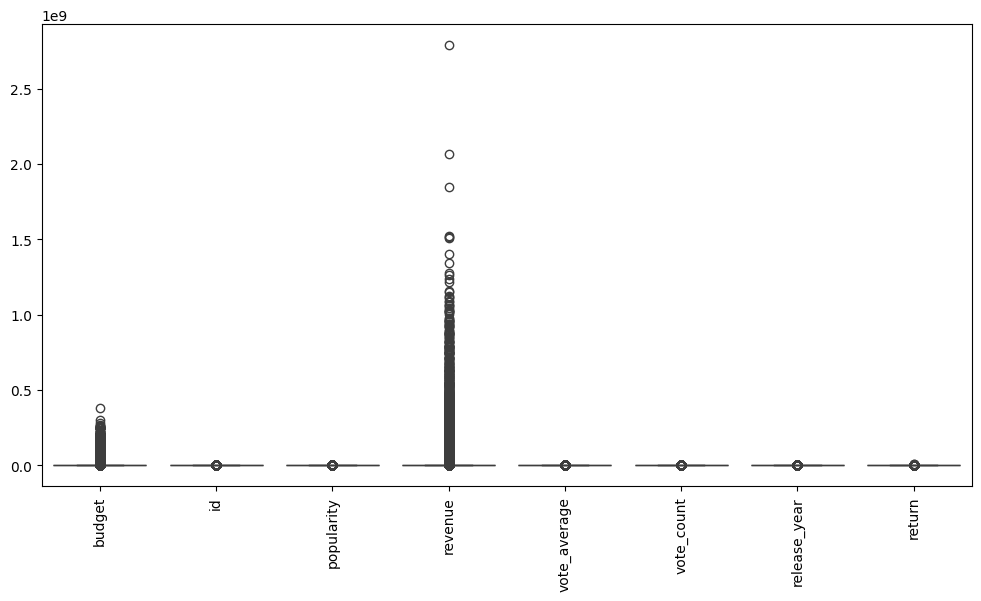

In [11]:
# Box plots para detectar outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.xticks(rotation=90)
plt.show()

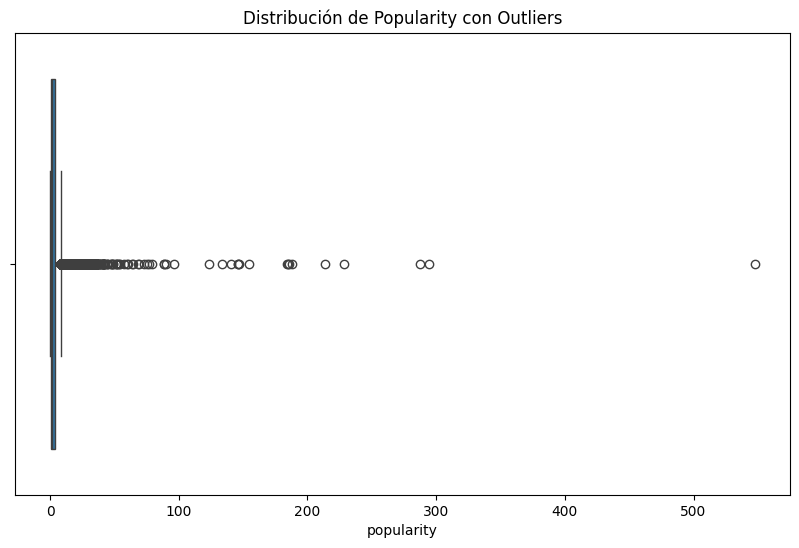

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['popularity'])
plt.title('Distribución de Popularity con Outliers')
plt.show()

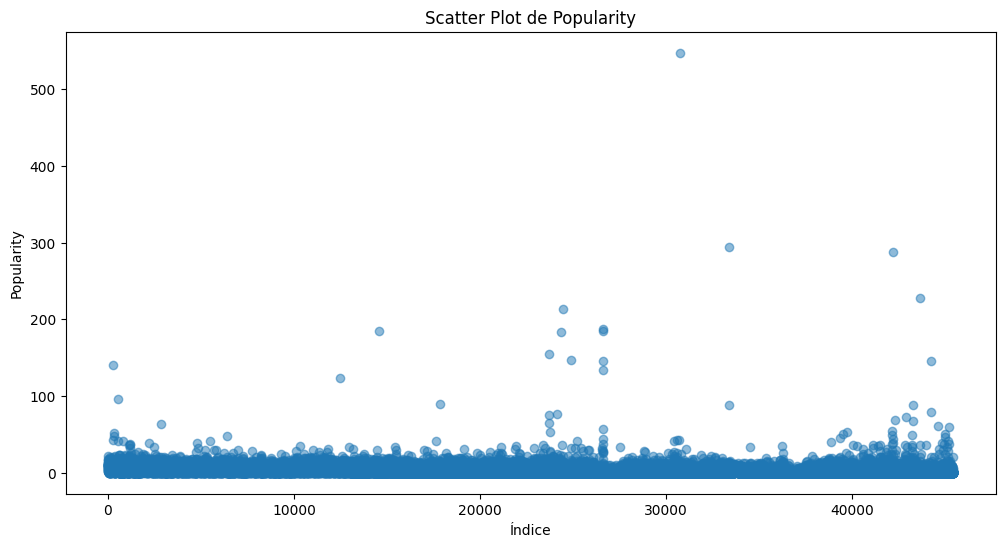

In [15]:
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df['popularity'], alpha=0.5)
plt.title('Scatter Plot de Popularity')
plt.xlabel('Índice')
plt.ylabel('Popularity')
plt.show()

In [17]:
Q1 = df['popularity'].quantile(0.25)
Q3 = df['popularity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['popularity'] < lower_bound) | (df['popularity'] > upper_bound)]
print(f"Número de outliers: {len(outliers)}")
print(outliers['popularity'].describe())



Número de outliers: 4211
count    4211.000000
mean       13.616169
std        14.788791
min         8.652856
25%         9.809376
50%        11.304280
75%        13.606973
max       547.488298
Name: popularity, dtype: float64


In [19]:
mean = df['popularity'].mean()
std = df['popularity'].std()
threshold = 3  # Número de desviaciones estándar

outliers = df[abs(df['popularity'] - mean) > threshold * std]
print(f"Número de outliers (usando 3 desviaciones estándar): {len(outliers)}")
print(outliers['popularity'].describe())

Número de outliers (usando 3 desviaciones estándar): 232
count    232.000000
mean      44.841983
std       53.210439
min       20.981716
25%       23.985207
50%       29.387560
75%       39.043057
max      547.488298
Name: popularity, dtype: float64


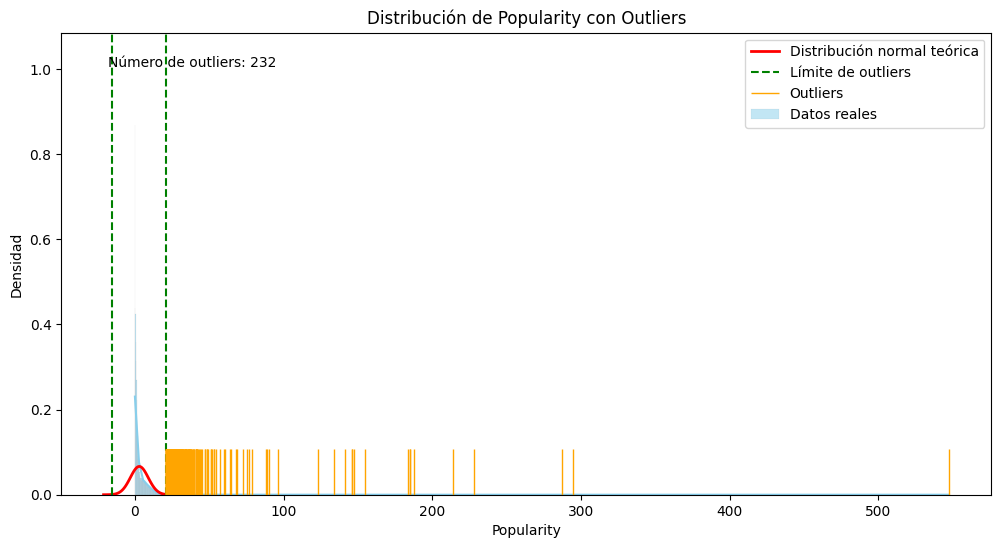

count    232.000000
mean      44.841983
std       53.210439
min       20.981716
25%       23.985207
50%       29.387560
75%       39.043057
max      547.488298
Name: popularity, dtype: float64


In [22]:

# Calcular la media y la desviación estándar
mean = df['popularity'].mean()
std = df['popularity'].std()
threshold = 3  # Número de desviaciones estándar

# Crear un rango de valores para la curva de distribución normal
x = np.linspace(mean - 4*std, mean + 4*std, 100)
y = stats.norm.pdf(x, mean, std)

# Crear el gráfico
plt.figure(figsize=(12, 6))

# Histograma de los datos reales
sns.histplot(df['popularity'], kde=True, stat='density', color='skyblue', label='Datos reales')

# Curva de distribución normal teórica
plt.plot(x, y, color='red', lw=2, label='Distribución normal teórica')

# Marcar los límites de los outliers
plt.axvline(mean - threshold*std, color='green', linestyle='--', label='Límite de outliers')
plt.axvline(mean + threshold*std, color='green', linestyle='--')

# Resaltar los outliers
outliers = df[abs(df['popularity'] - mean) > threshold * std]
sns.rugplot(outliers['popularity'], color='orange', label='Outliers', height=0.1)

plt.title('Distribución de Popularity con Outliers')
plt.xlabel('Popularity')
plt.ylabel('Densidad')
plt.legend()

# Añadir texto con información sobre los outliers
plt.text(0.05, 0.95, f"Número de outliers: {len(outliers)}", transform=plt.gca().transAxes, 
         verticalalignment='top')

plt.show()

# Imprimir estadísticas de los outliers
print(outliers['popularity'].describe())

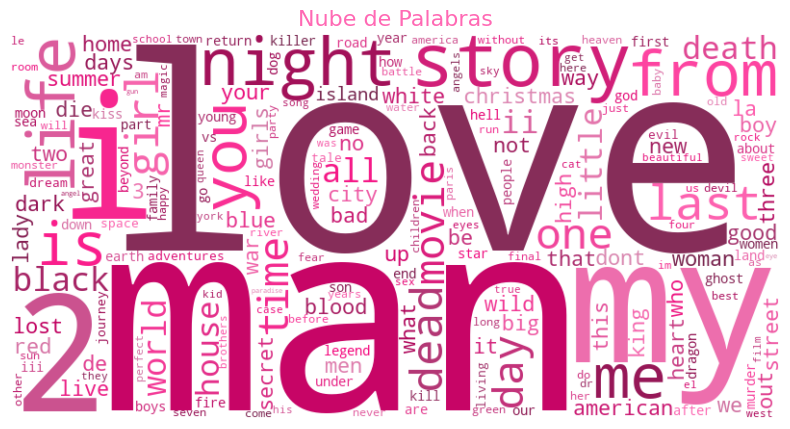

In [31]:
#Nube de palabras
stop_words = set(['the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by'])

text = ' '.join(df['title'])
text = re.sub(r'[^\w\s]', '', text.lower())
words = [word for word in text.split() if word not in stop_words]
word_counts = Counter(words)

# Función para generar colores en tonos rosados
def pink_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(330, {}%, {}%)".format(random.randint(50, 100), random.randint(30, 70))

wordcloud = WordCloud(width=800, 
                      height=400, 
                      background_color='white',
                      color_func=pink_color_func,
                      prefer_horizontal=0.9).generate_from_frequencies(word_counts)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras', fontsize=16, color='hotpink')
plt.show()

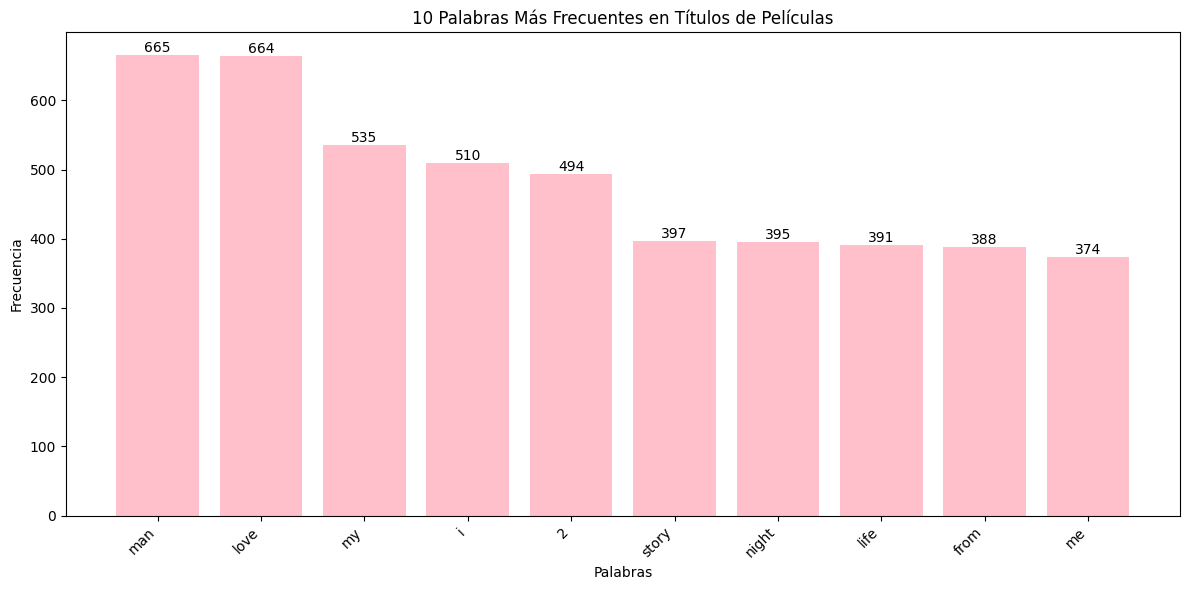

Ranking de las 10 palabras más frecuentes:
man: 665
love: 664
my: 535
i: 510
2: 494
story: 397
night: 395
life: 391
from: 388
me: 374


In [28]:
#Grafico de barras(10 palabras mas utilizadas en titulos de peliculas)
stop_words = set(['the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by'])

text = ' '.join(df['title'])

text = re.sub(r'[^\w\s]', '', text.lower())

words = [word for word in text.split() if word not in stop_words]

word_counts = Counter(words)


top_words = word_counts.most_common(10)

words, counts = zip(*top_words)


plt.figure(figsize=(12, 6))
bars = plt.bar(words, counts, color= 'pink')
plt.title('10 Palabras Más Frecuentes en Títulos de Películas')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("Ranking de las 10 palabras más frecuentes:")
for word, count in top_words:
    print(f"{word}: {count}")